
Looking at plotting a smith chart. Demonstrate what each element does in a smith chart. 
<hr>
10-Feb-23    CBL    Original
<hr> 
<ul>
<li> https://scikit-rf.readthedocs.io/en/latest/tutorials/Plotting.html </li>
<li> github associated with this: https://github.com/scikit-rf/ </li>
<li> https://scikit-rf.readthedocs.io/en/latest/tutorials/Networks.html </li>
</ul>


In [2]:
import numpy as np               # numpy is all the numerical stuff
import matplotlib.pyplot as plt  # I happen to always include this so I can make plots
import skrf as rf                # this is part of the overall SCIKIT-RF
from skrf import Network         # How do I create the network?
from skrf import Frequency       # for making up an array of frequency values
from skrf import plotting        # Plotting
import math                      # Additional math stuff. not always used. 

2-Port Network: '',  1.0-4.0 GHz, 4 pts, z0=[50.+0.j 50.+0.j]


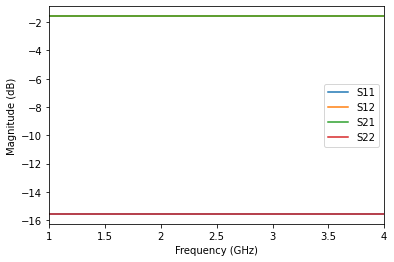

In [3]:
# Create an example 2 port network using a frequency and Z (complex impedance)
f = np.array([1, 2, 3, 4]) # in GHz
# Before creating the scikit-rf Network object, one must forge the Frequency and S-matrix:
freq = rf.Frequency.from_f(f, unit='GHz')
Z = 20
abcd = np.array([[1, Z],
              [0, 1]])

a = np.tile(abcd, (len(freq),1,1))
ntw = Network(frequency=freq, a=a)
print(ntw)
ntw.plot_s_db()

In [4]:
# example: converting a -> s
s = rf.a2s(a)
# checking that these S-params are the same
np.all(ntw.s == s)

True

1-Port Network: '',  1.0-10.0 GHz, 101 pts, z0=[50.+0.j]


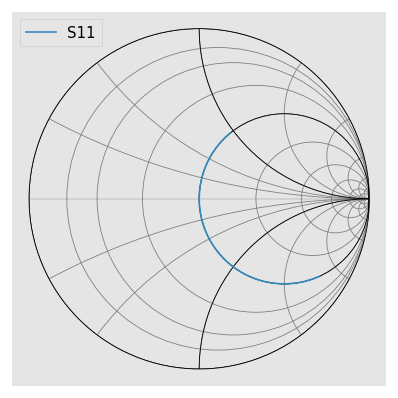

In [31]:
# 1 port network from Z
# frequency definition, 101 points 1-10 GHz. 
freq = Frequency(1, 10, 101, 'ghz')
omega = 2.0*np.pi * freq.f
# Use numpy to create an array of Z. 
# in this case a 1x1 array of length of the frequency vector. 
# 10j is an inductance 
if (0):
    z = np.full((len(freq), 1, 1), 10j)  # replicate z=10j for all frequencies
else:
    L = 1.0e-9  # Henries, assign a fixed value
    C = 1.0e-12 # Farads
    X_L = omega * L * 1j    # inductive reactance
    X_C = -1j/(omega*C)     # capacitive reactance
    z = X_C + 50 + X_L

ntw = rf.Network(frequency=freq, z=z)
print(ntw)
rf.stylely()
ntw.plot_s_smith()

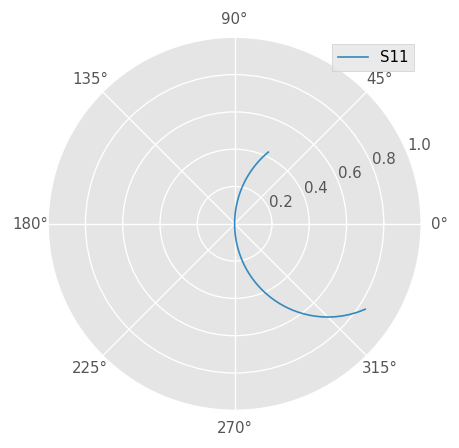

In [32]:
ntw.plot_s_polar()

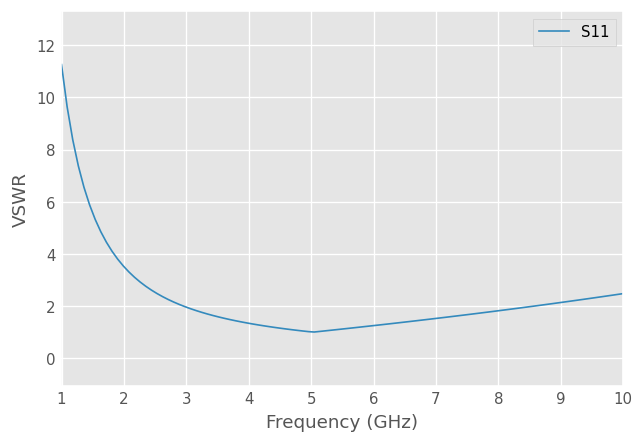

In [39]:
ntw.plot_s_vswr()

In [30]:
print(help(Network))

Help on class Network in module skrf.network:

class Network(builtins.object)
 |  Network(file: str = None, name: str = None, params: dict = None, comments: str = None, f_unit: str = None, s_def: str = 'power', **kwargs) -> None
 |  
 |  A n-port electrical network.
 |  
 |  For instructions on how to create Network see  :func:`__init__`.
 |  A n-port network [#TwoPortWiki]_ may be defined by three quantities
 |  * network parameter matrix (s, z, or y-matrix)
 |  * port characteristic impedance matrix
 |  * frequency information
 |  
 |  The :class:`Network` class stores these data structures internally
 |  in the form of complex :class:`numpy.ndarray`'s. These arrays are not
 |  interfaced directly but instead through the use of the properties:
 |  
 |  =====================  =============================================
 |  Property               Meaning
 |  =====================  =============================================
 |  :attr:`s`              scattering parameter matrix
 | 

In [14]:
print(help(Frequency))

Help on class Frequency in module skrf.frequency:

class Frequency(builtins.object)
 |  Frequency(start: float = 0, stop: float = 0, npoints: int = 0, unit: str = 'ghz', sweep_type: str = 'lin') -> None
 |  
 |  A frequency band.
 |  
 |  The frequency object provides a convenient way to work with and
 |  access a frequency band. It contains  a frequency vector as well as
 |  a frequency unit. This allows a frequency vector in a given unit
 |  to be available (:attr:`f_scaled`), as well as an absolute frequency
 |  axis in 'Hz'  (:attr:`f`).
 |  
 |  A Frequency object can be created from either (start, stop, npoints)
 |  using the default constructor, :func:`__init__`. Or, it can be
 |  created from an arbitrary frequency vector by using the class
 |  method :func:`from_f`.
 |  
 |  Internally, the frequency information is stored in the `f` property
 |  combined with the `unit` property. All other properties, `start`
 |  `stop`, etc are generated from these.
 |  
 |  Methods defined h

In [35]:
dir(Network)

['COMPONENT_FUNC_DICT',
 'PRIMARY_PROPERTIES',
 'Y_LABEL_DICT',
 '_M',
 '_M_circle',
 '_Network__compatable_for_scalar_operation_test',
 '_Network__generate_secondary_properties',
 '_Network__generate_subnetworks',
 '_P',
 '_Q',
 '_T',
 '_X',
 '_Xi',
 '_Xi_tilde',
 '__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__pow__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__rshift__',
 '__rsub__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_m',
 'a',
 'a_arcl',
 'a_arcl_unwrap',
 'a_db',
 'a_db10',
 'a_deg',
 'a_deg_unwrap',
 'a_im',
 'a_mag',
 'a_rad',
 'a_rad_unwrap',
 'a_re',
 'a_time',
 'a_time_db',
 'a_time_impulse',
 '

In [40]:
ntw.s

array([[[7.00327611e-01-0.45811445j]],

       [[6.59480660e-01-0.47388387j]],

       [[6.19001085e-01-0.48563231j]],

       [[5.79274907e-01-0.49367549j]],

       [[5.40610750e-01-0.49834804j]],

       [[5.03246447e-01-0.49998946j]],

       [[4.67357114e-01-0.4989333j ]],

       [[4.33063787e-01-0.49549929j]],

       [[4.00442002e-01-0.48998796j]],

       [[3.69529875e-01-0.48267748j]],

       [[3.40335433e-01-0.47382194j]],

       [[3.12843061e-01-0.46365103j]],

       [[2.87019043e-01-0.45237055j]],

       [[2.62816218e-01-0.44016344j]],

       [[2.40177832e-01-0.42719134j]],

       [[2.19040661e-01-0.41359624j]],

       [[1.99337505e-01-0.39950227j]],

       [[1.80999157e-01-0.38501748j]],

       [[1.63955918e-01-0.37023557j]],

       [[1.48138745e-01-0.35523747j]],

       [[1.33480102e-01-0.34009288j]],

       [[1.19914572e-01-0.32486161j]],

       [[1.07379278e-01-0.30959485j]],

       [[9.58141517e-02-0.2943362j ]],

       [[8.51620875e-02-0.27912274j]],



Moving on, can we make a circuit and then calculate the s parameters from it? 
<br> 
https://eng.libretexts.org/Bookshelves/Electrical_Engineering/Electronics/Microwave_and_RF_Design_III_-_Networks_(Steer)/02%3A_Chapter_2/2.3%3A_Scattering_Parameters